In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_style('darkgrid')

%matplotlib inline

In [2]:
df = pd.read_csv('conhecimento_filtrado.csv')
print(len(df))
print(df.verifica.value_counts())

82053
3    58764
1    12893
0    10396
Name: verifica, dtype: int64


In [6]:
df1 = df[df.verifica==1].copy().reset_index(drop=True)
print(len(df1))

df3_full = df[df.verifica==3].copy().reset_index(drop=True)
print('3 full', len(df3_full))
ids_3 = np.random.choice(
    df3_full.id
    ,len(df1)
    ,replace=False
)

df3 = df[df.id.isin(ids_3)].copy().reset_index(drop=True)
print(len(df3))

12893
3 full 58764
12893


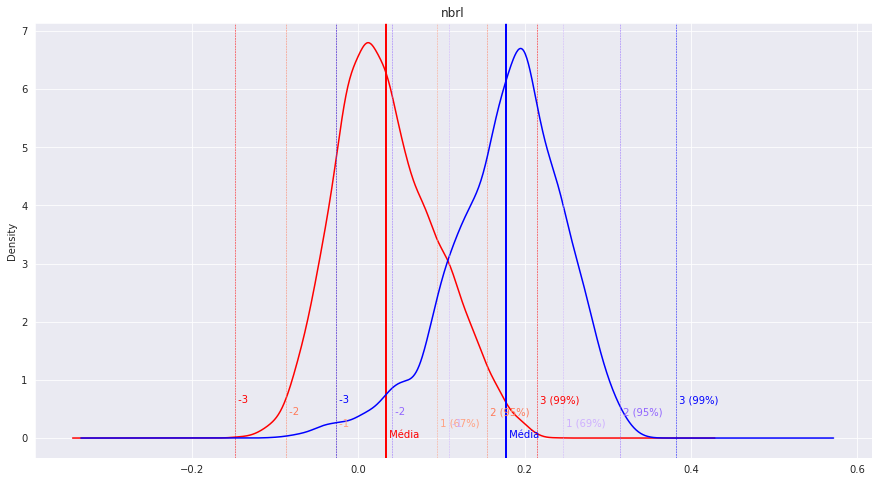

In [161]:
col = 'nbrl'
def plt_desv(d, desvio, media, x, cor):
    depois = media+(d*desvio)
    antes = media-(d*desvio)
    qta = len(x[(x>antes) & (x<depois)])
    label = int((qta*100)/len(x))
    
    plt.axvline(depois, linestyle='dashed', linewidth=0.5, c=cor)
    plt.text(depois, (d*2)/10, ' %s (%s%%)' % (d, label), color=cor)
    
    plt.axvline(antes, linestyle='dashed', linewidth=0.5, c=cor)
    plt.text(antes, (d*2)/10, ' -%s' % d, color=cor)
def densidade(col):
    fig, ax = plt.subplots()
    ax.set_title(col)
    
    ################### - 1 - #####################
    x = df1[col]
    media = np.mean(x)
    mediana = np.median(x)
    desvio = np.std(x)
    x.plot.kde(ax=ax, legend=False, c='r', figsize=(15,8))
#     plt.axvline(media, linestyle='solid', linewidth=2, c='red')
#     plt.text(media,0, ' Média', color='red')
    
    plt.axvline(mediana, linestyle='solid', linewidth=2, c='red')
    plt.text(mediana,0, ' Mediana', color='red')

    plt_desv(1, desvio, media, x, '#ffa284')
    plt_desv(2, desvio, media, x, '#ff7b5a')
    plt_desv(3, desvio, media, x, 'red')
    ################### - 3 - #####################
    x = df3[col]
    media = np.mean(x)
    desvio = np.std(x)
    x.plot.kde(ax=ax, legend=False, c='b', figsize=(15,8))
    plt.axvline(media, linestyle='solid', linewidth=2, c='blue')
    plt.text(media,0, ' Média', color='blue')

    plt_desv(1, desvio, media, x, '#cfb1ff')
    plt_desv(2, desvio, media, x, '#9265ff')
    plt_desv(3, desvio, media, x, 'blue')
densidade(col)

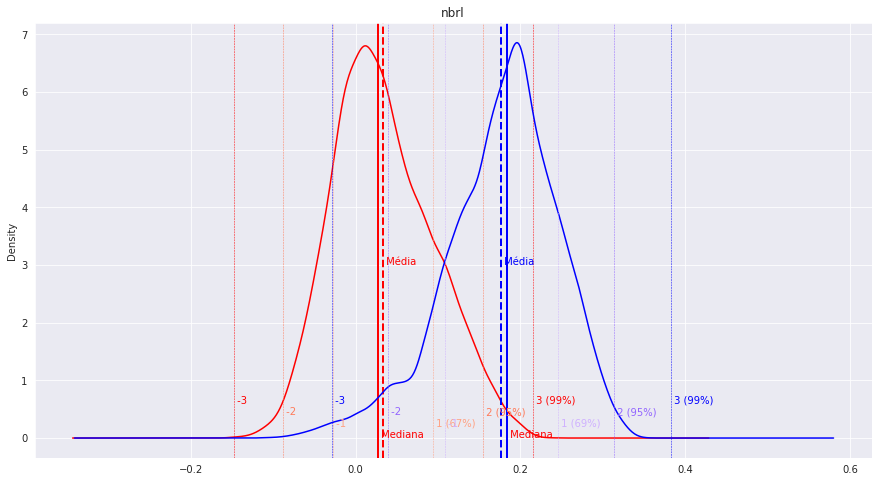

In [182]:
col = 'nbrl'
def plt_desv(d, desvio, media, x, cor):
    depois = media+(d*desvio)
    antes = media-(d*desvio)
    qta = len(x[(x>antes) & (x<depois)])
    label = int((qta*100)/len(x))
    
    plt.axvline(depois, linestyle='dashed', linewidth=0.5, c=cor)
    plt.text(depois, (d*2)/10, ' %s (%s%%)' % (d, label), color=cor)
    
    plt.axvline(antes, linestyle='dashed', linewidth=0.5, c=cor)
    plt.text(antes, (d*2)/10, ' -%s' % d, color=cor)
def densidade(col):
    fig, ax = plt.subplots()
    ax.set_title(col)
    
    ################### - 1 - #####################
    x = df1[col]
    media = np.mean(x)
    mediana = np.median(x)
    desvio = np.std(x)
    x.plot.kde(ax=ax, legend=False, c='r', figsize=(15,8))
    plt.axvline(media, linestyle='dashed', linewidth=2, c='red')
    plt.text(media,3, ' Média', color='red')
    
    plt.axvline(mediana, linestyle='solid', linewidth=2, c='red')
    plt.text(mediana,0, ' Mediana', color='red')

    plt_desv(1, desvio, media, x, '#ffa284')
    plt_desv(2, desvio, media, x, '#ff7b5a')
    plt_desv(3, desvio, media, x, 'red')
    ################### - 3 - #####################
    x = df3_full[col]
    media = np.mean(x)
    mediana = np.median(x)
    desvio = np.std(x)
    x.plot.kde(ax=ax, legend=False, c='b', figsize=(15,8))
    plt.axvline(media, linestyle='dashed', linewidth=2, c='blue')
    plt.text(media,3, ' Média', color='blue')
    plt.axvline(mediana, linestyle='solid', linewidth=2, c='blue')
    plt.text(mediana,0, ' Mediana', color='red')

    plt_desv(1, desvio, media, x, '#cfb1ff')
    plt_desv(2, desvio, media, x, '#9265ff')
    plt_desv(3, desvio, media, x, 'blue')
densidade(col)

In [112]:
x = df1[col]
total = len(x)
media = np.mean(x)
desvio = np.std(x)

dv = desvio*-1
dv1 = len(x[(x>media-dv) & (x<media+dv)])

int((dv1*100)/total)

0

In [9]:
cols = ['ndvi', 'nbrl', 'dif_ndvi', 'dif_dnbrl', 'medianb2', 'medianb3',
       'medianb4', 'medianb5', 'medianb6', 'medianb7']

In [163]:
def distribuicao(col):
    fig, ax = plt.subplots()
    ax.set_title(col)
    df1[col].plot(ax=ax, legend=False, c='r', figsize=(15,8))
    df3[col].plot(ax=ax, legend=False, c='b', figsize=(15,8))
    
def compara(col):
    fig, ax = plt.subplots()
    ax.set_title(col)
    df1[col].plot.kde(ax=ax, legend=False, c='r', figsize=(15,8))
    df3[col].plot.kde(ax=ax, legend=False, c='b', figsize=(15,8))
    df3_full[col].plot.kde(ax=ax, legend=False, c='g', figsize=(15,8))

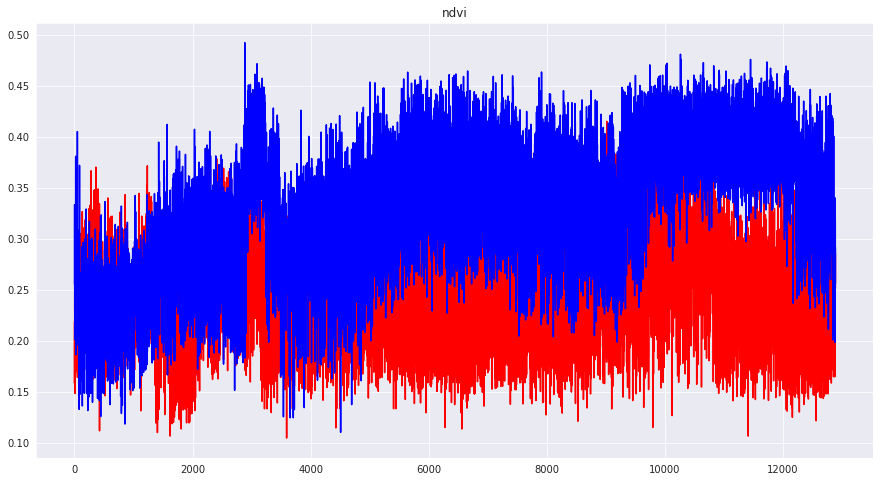

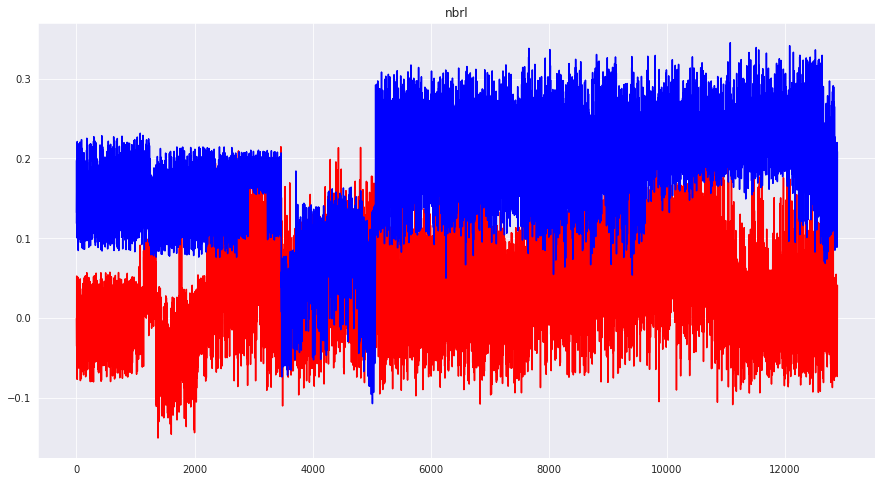

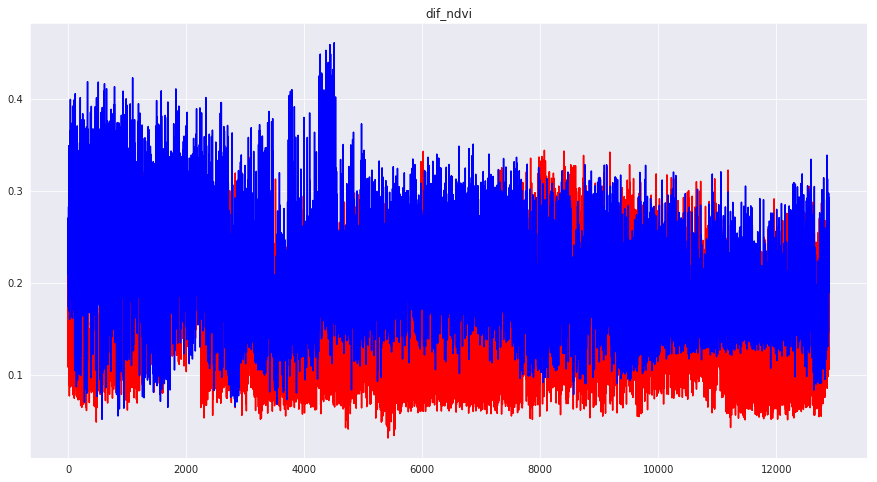

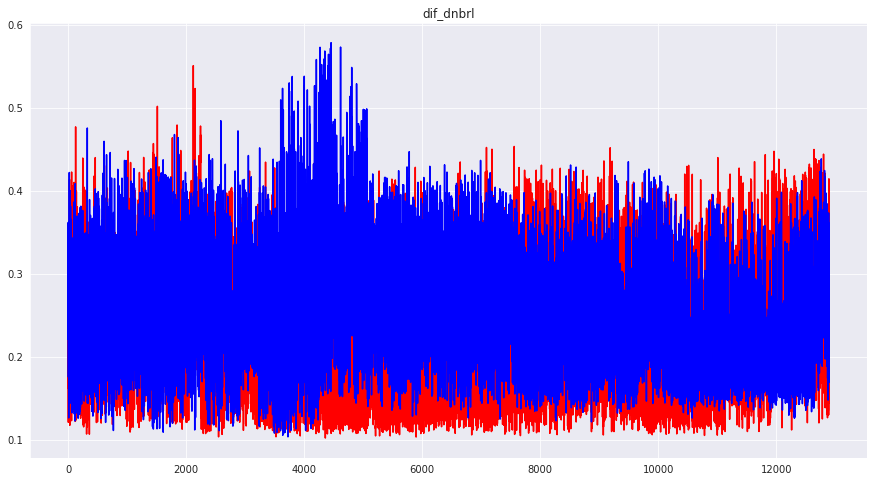

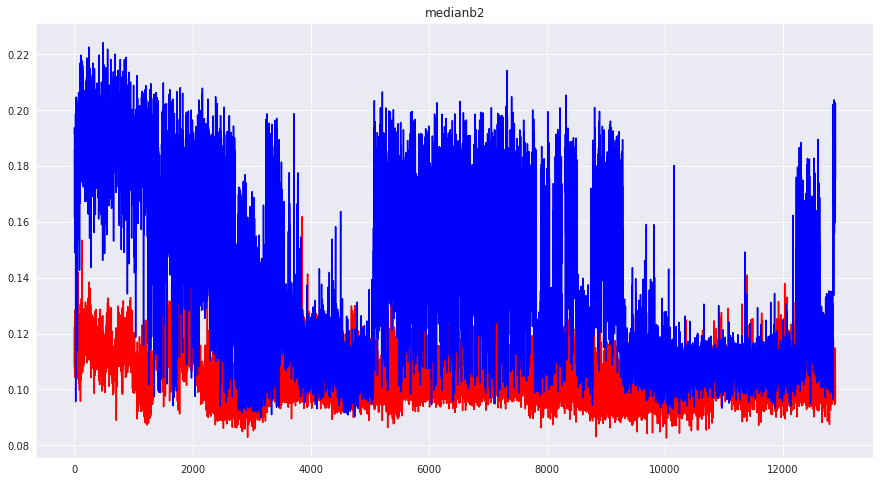

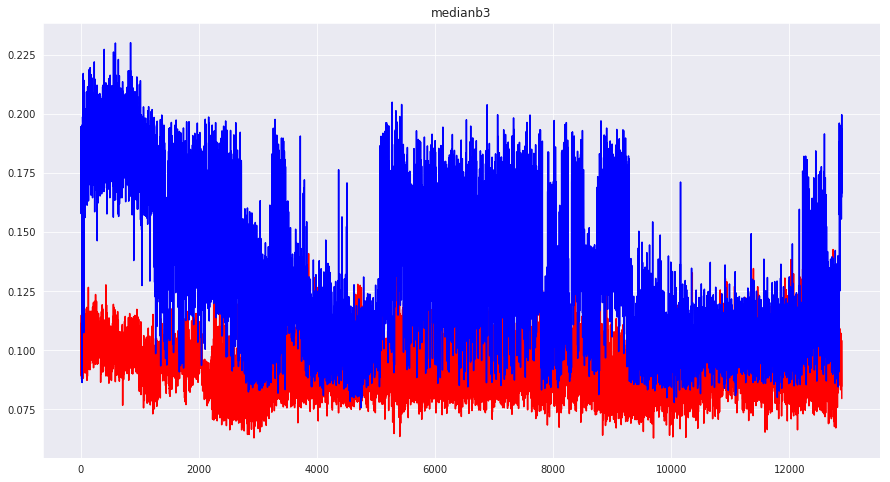

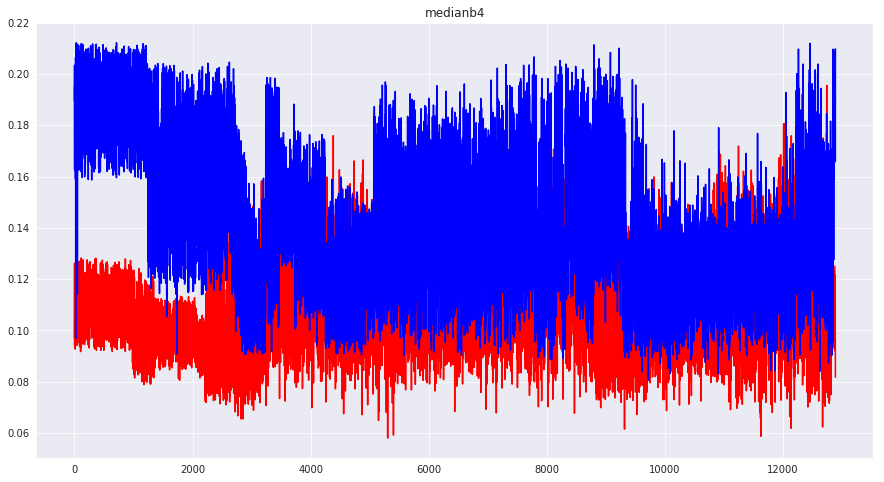

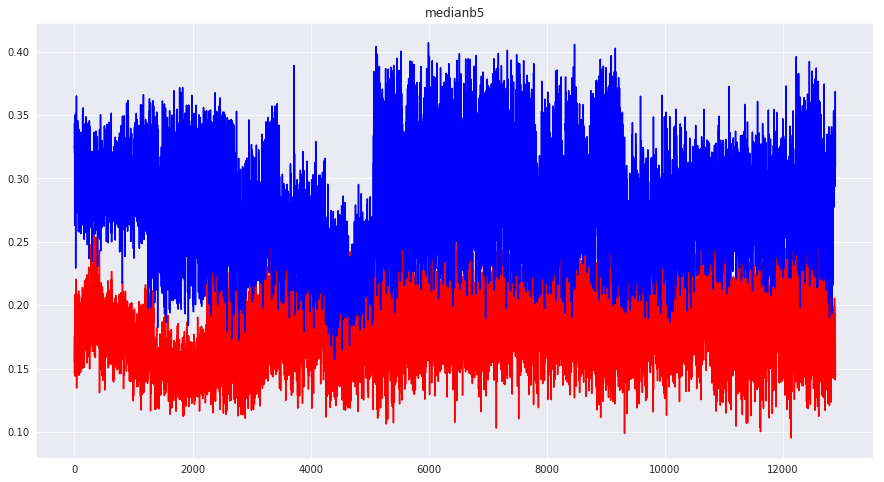

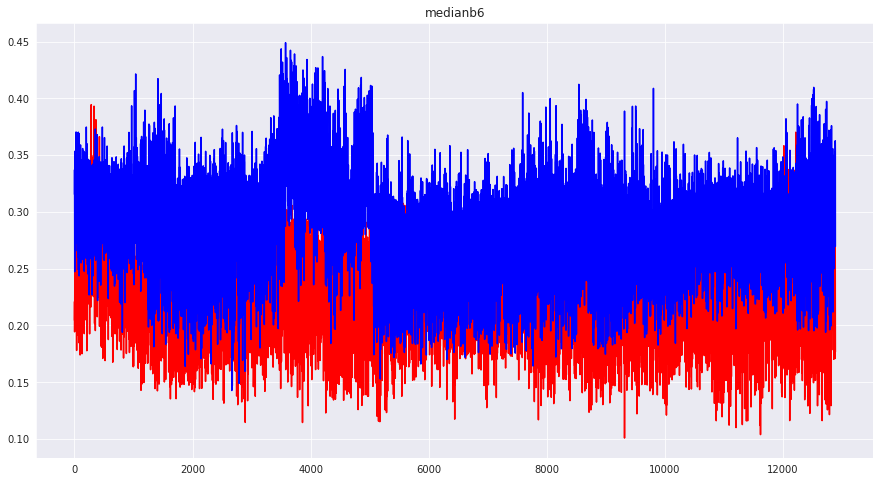

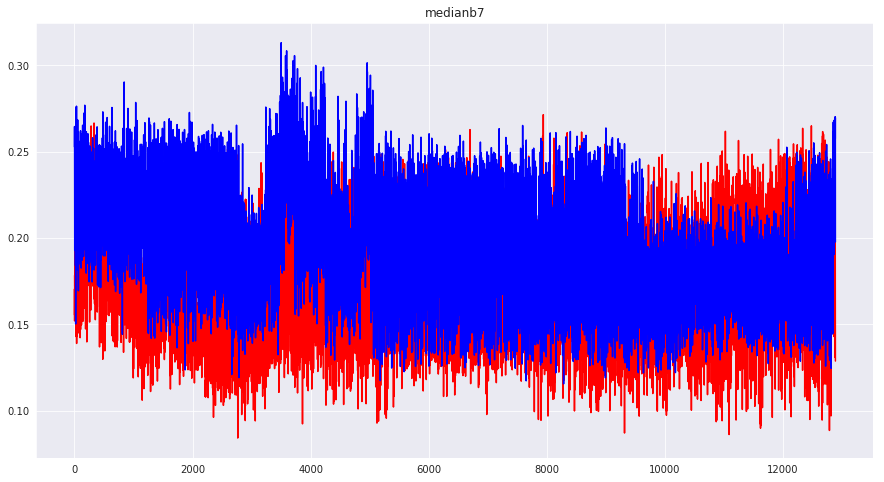

In [165]:
for col in cols:
    distribuicao(col)

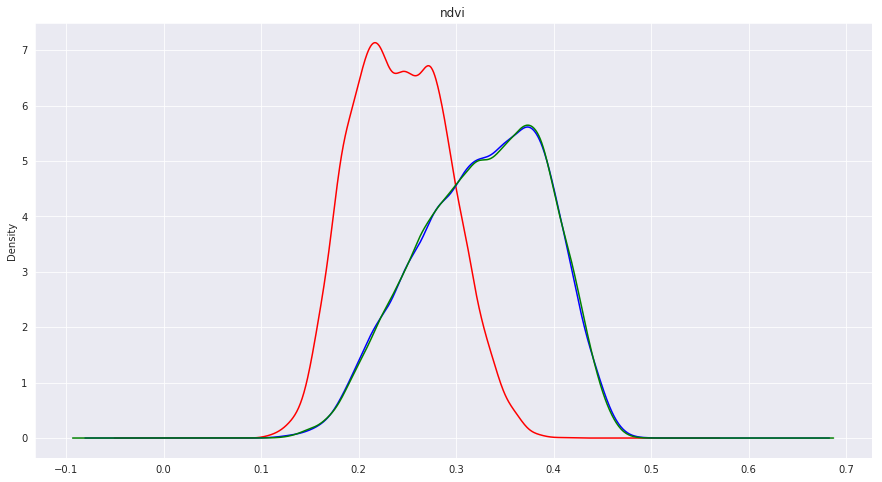

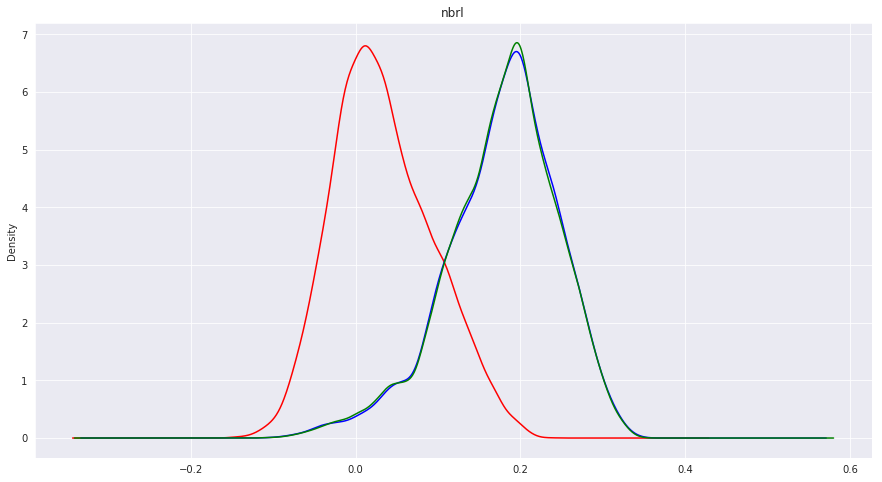

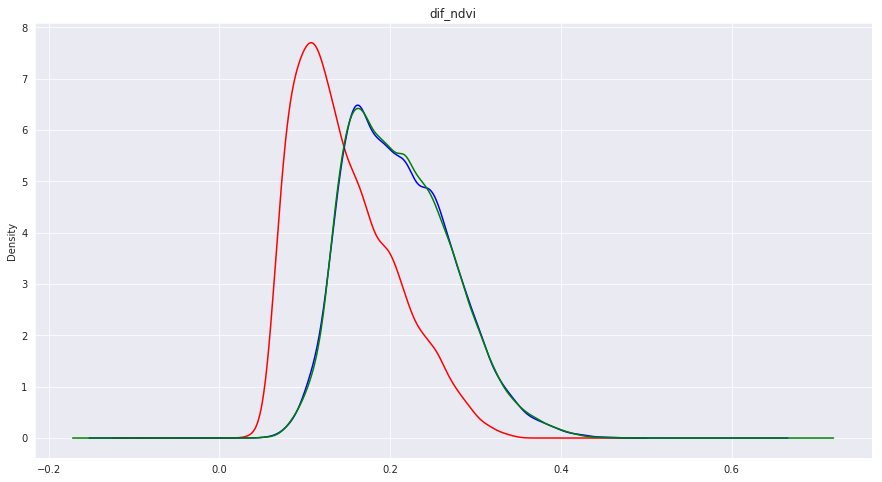

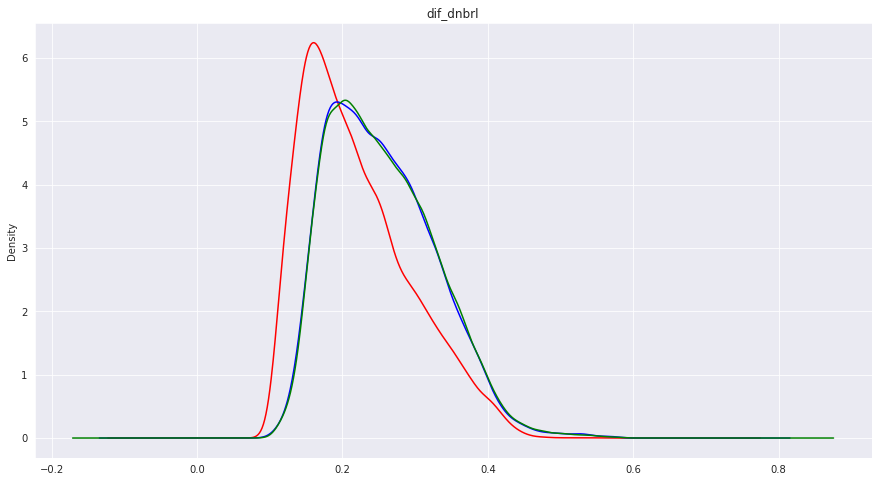

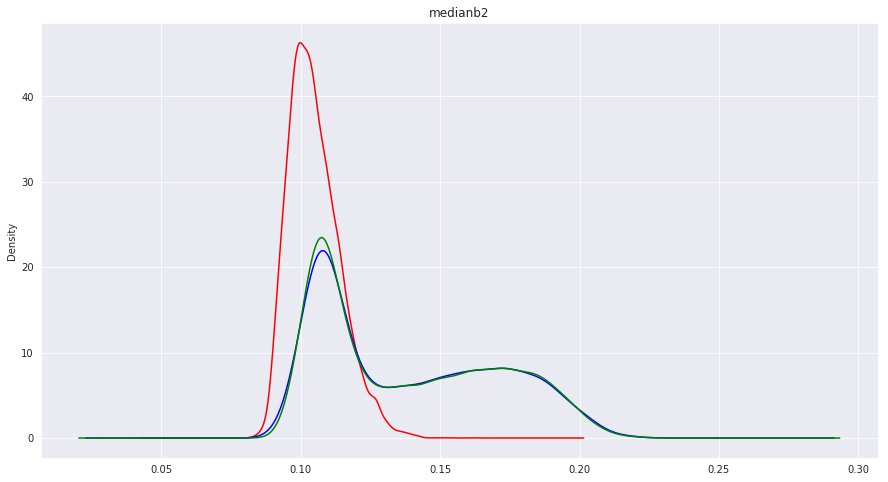

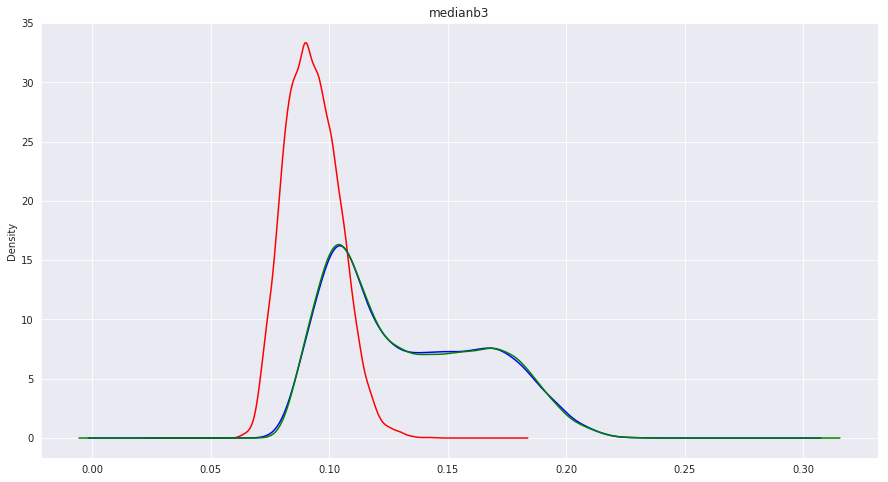

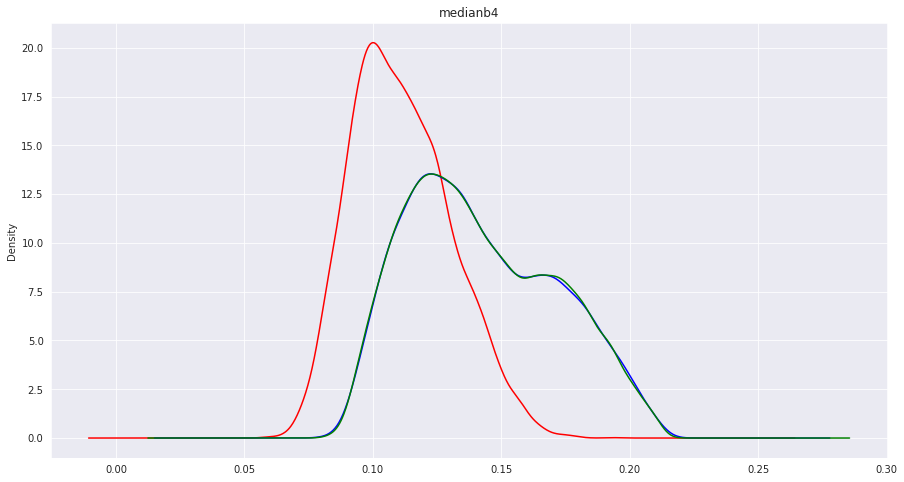

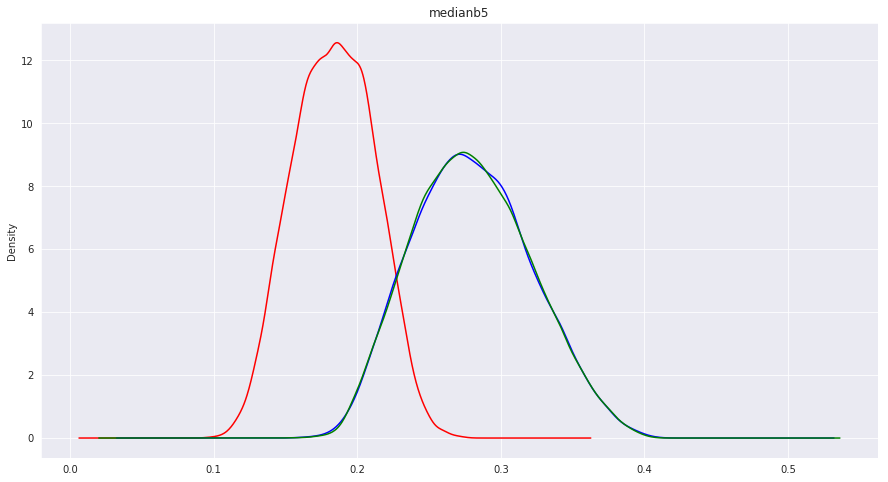

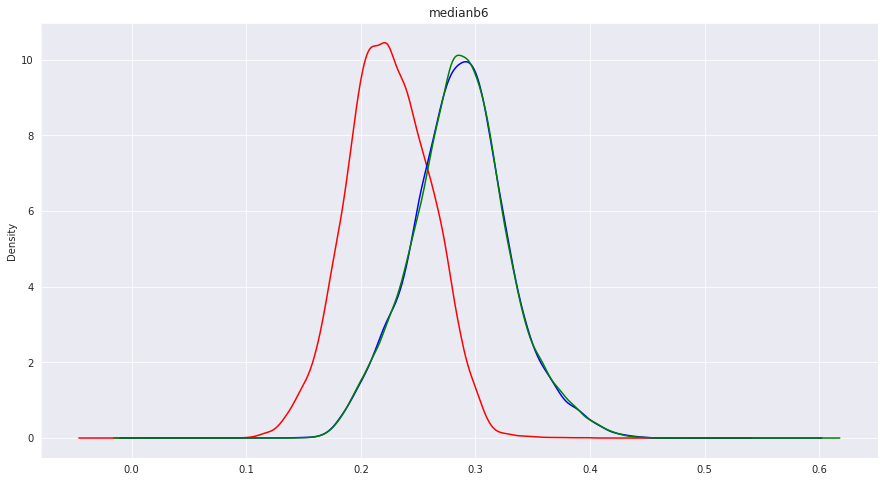

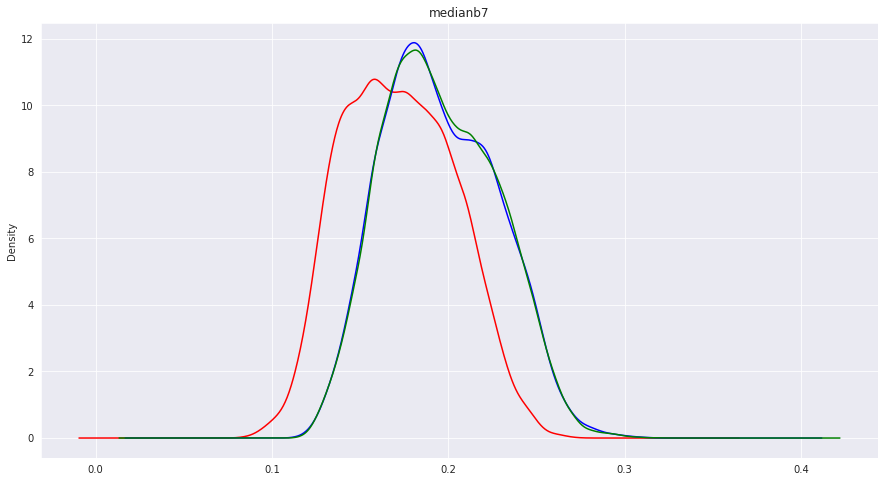

In [164]:
for col in cols:
    compara(col)

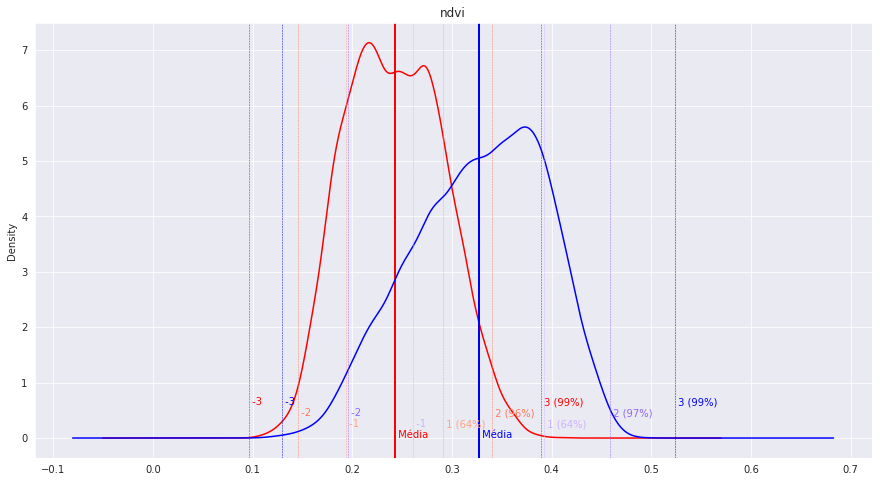

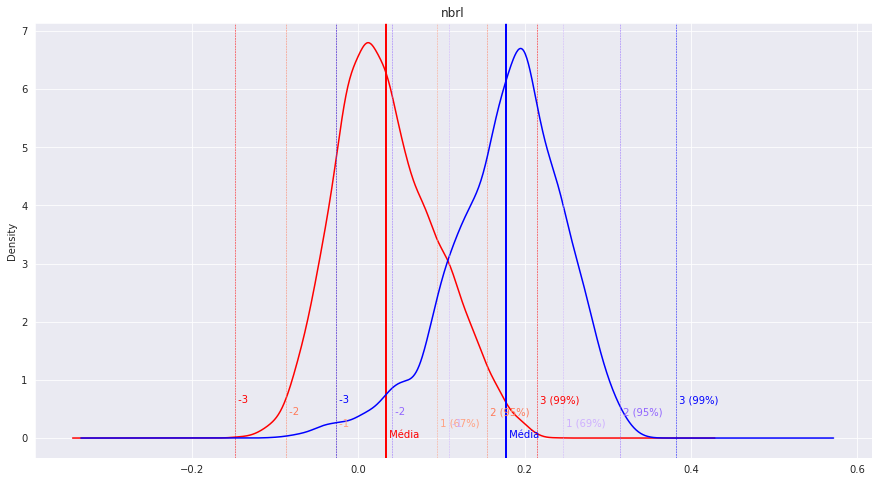

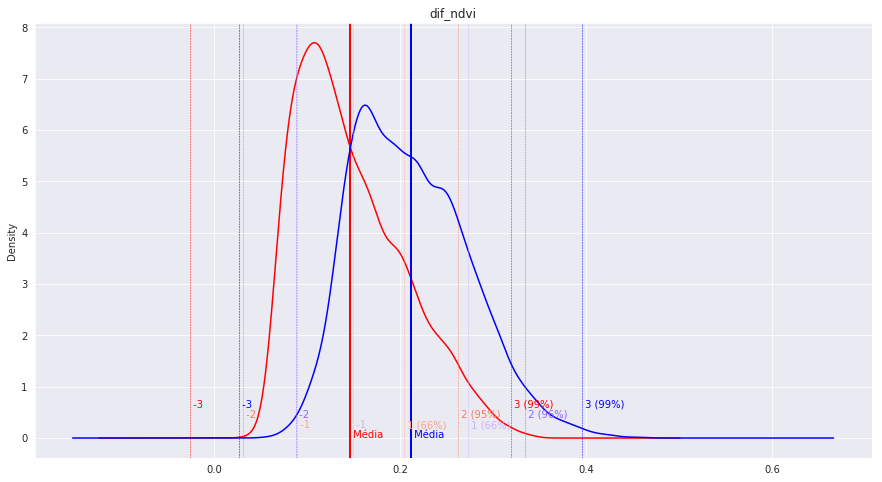

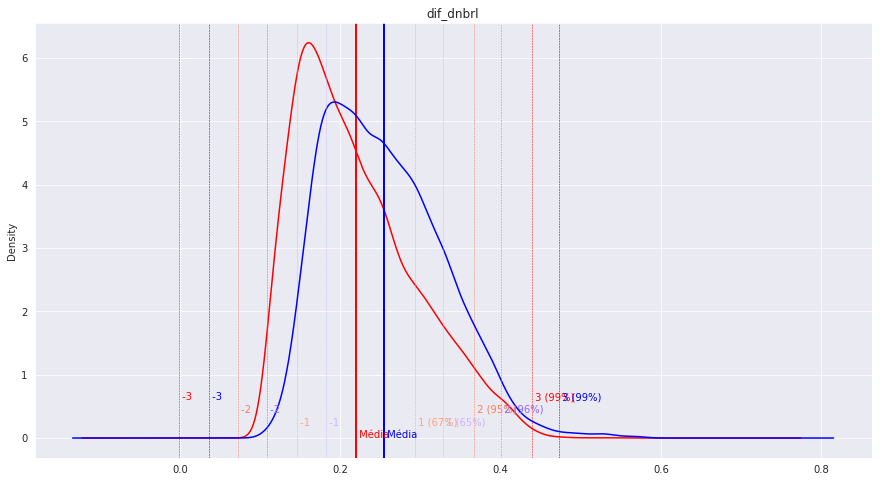

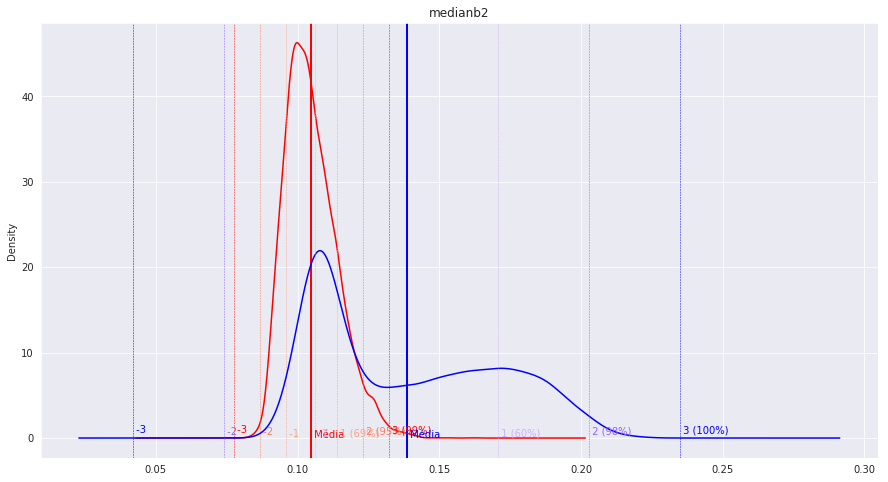

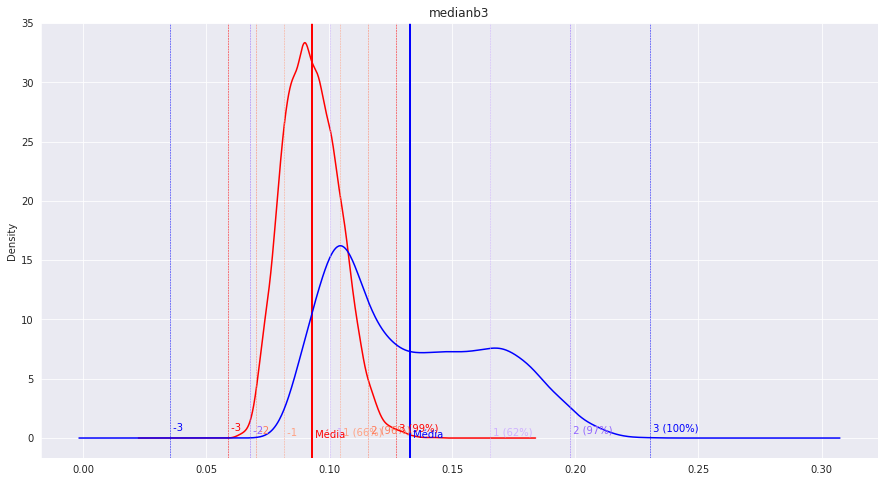

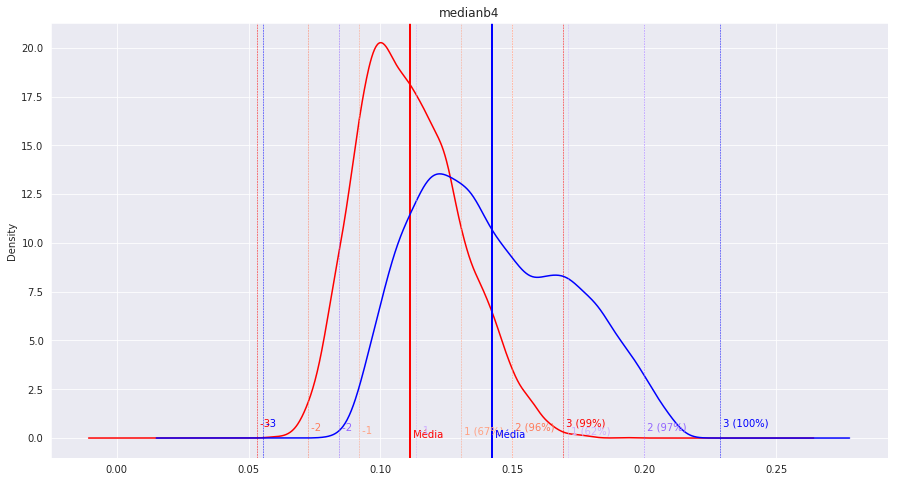

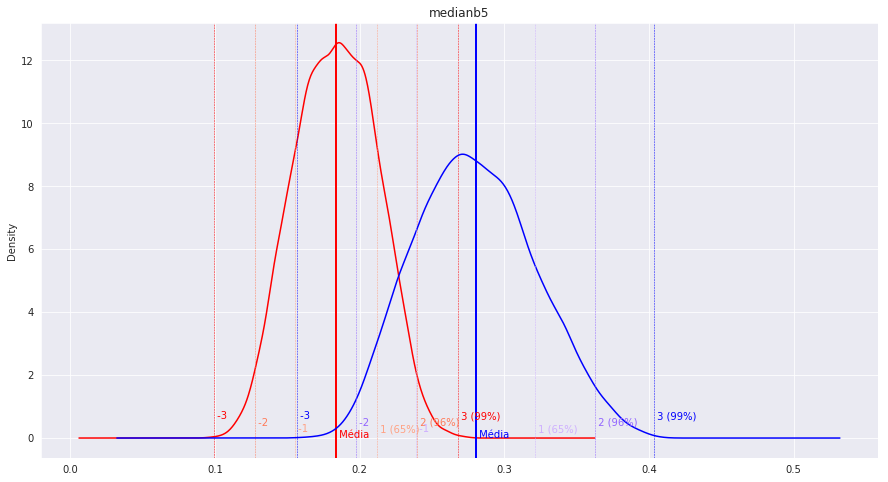

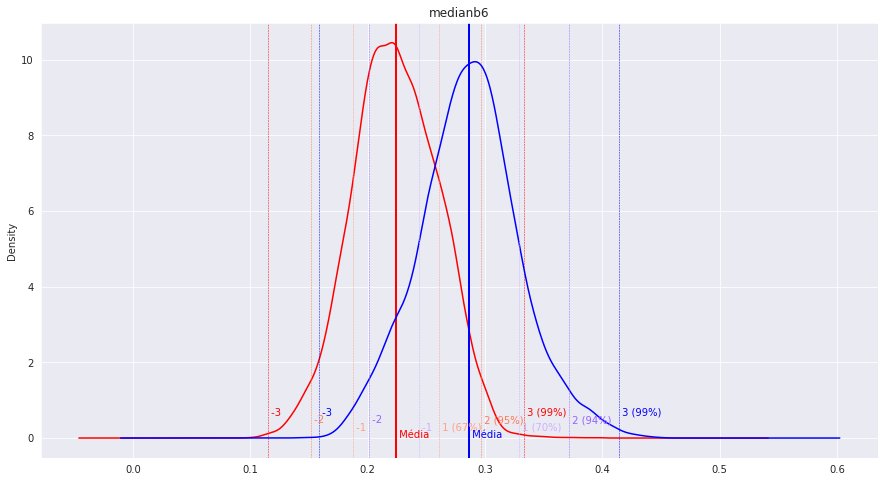

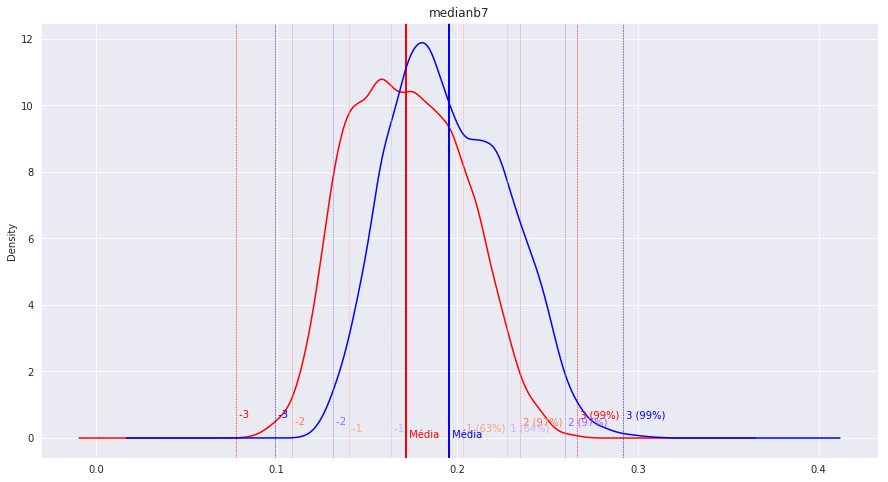

In [166]:
for col in cols:
    densidade(col)

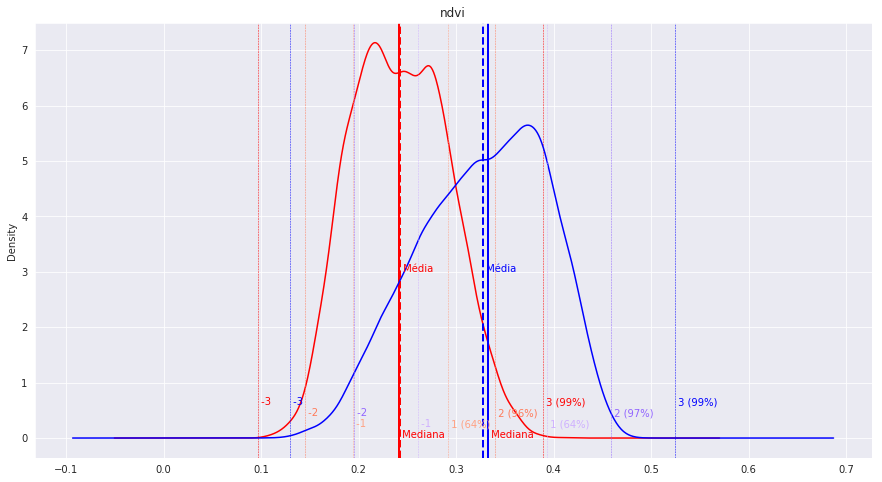

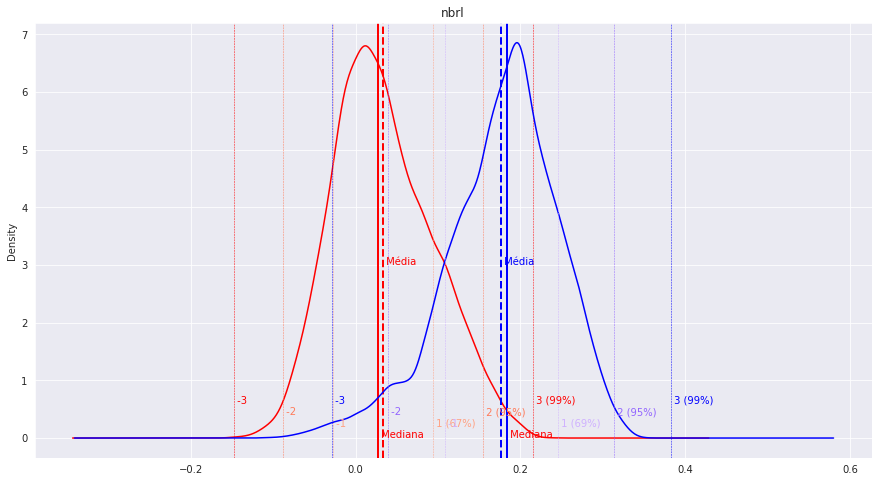

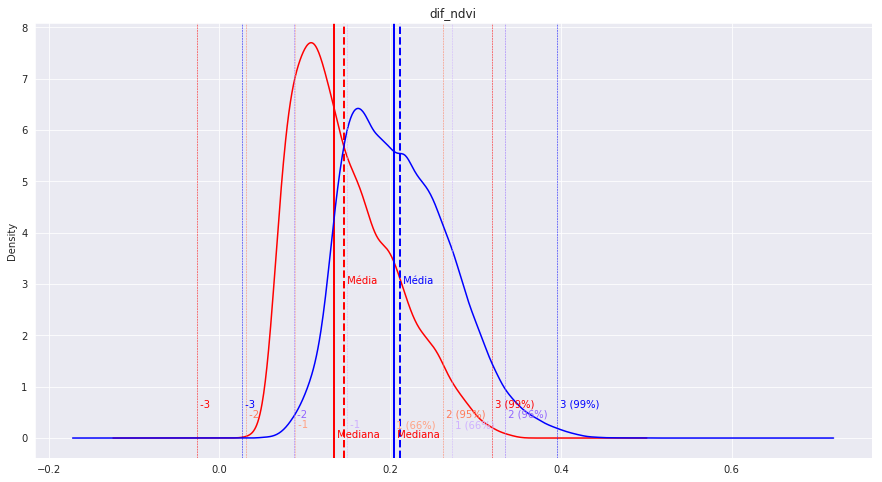

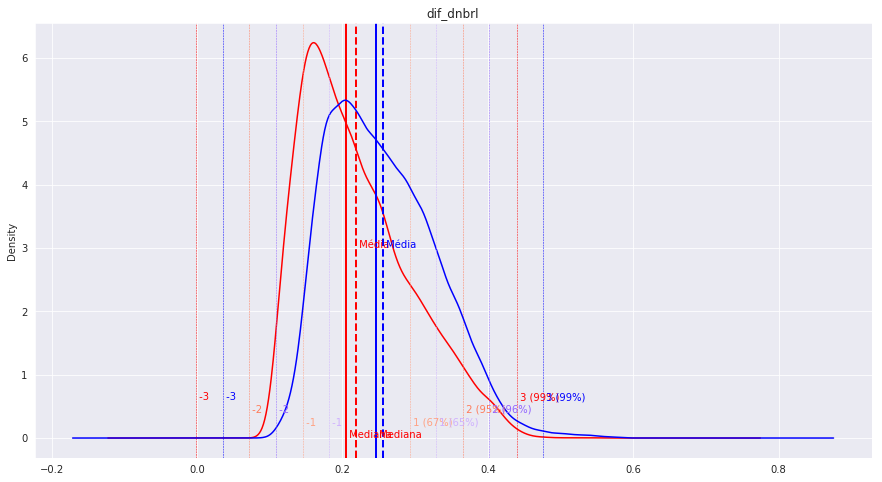

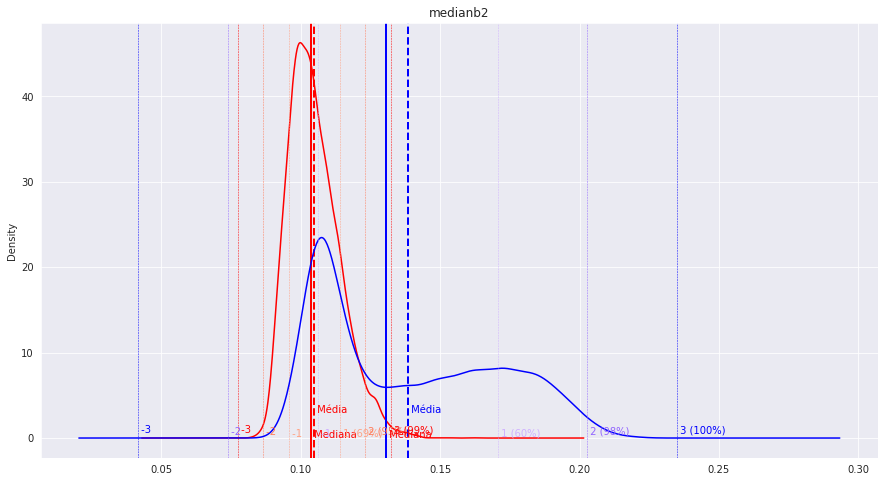

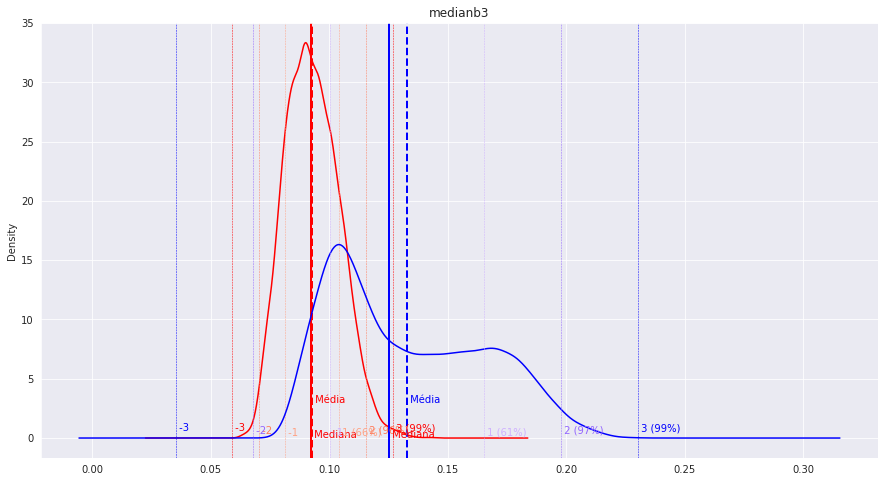

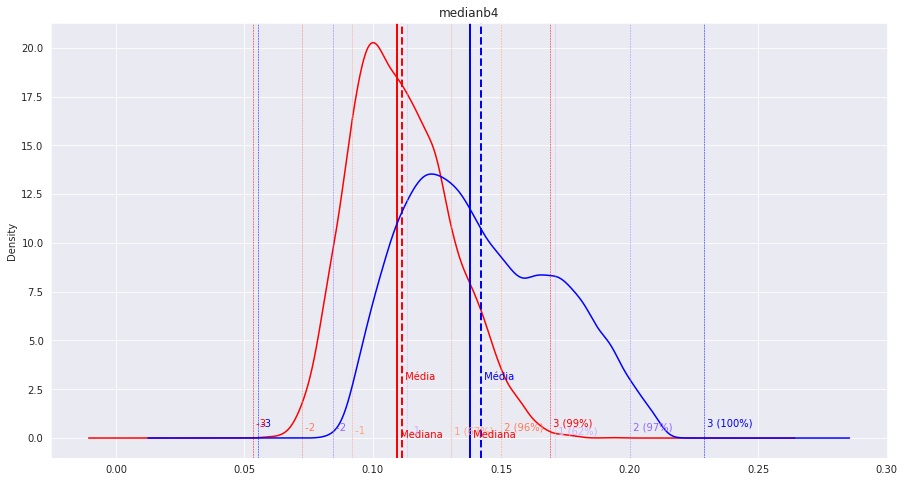

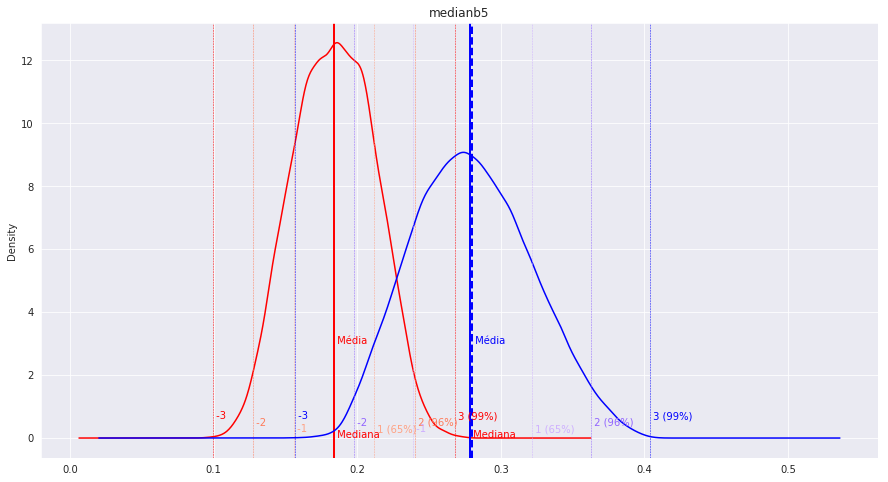

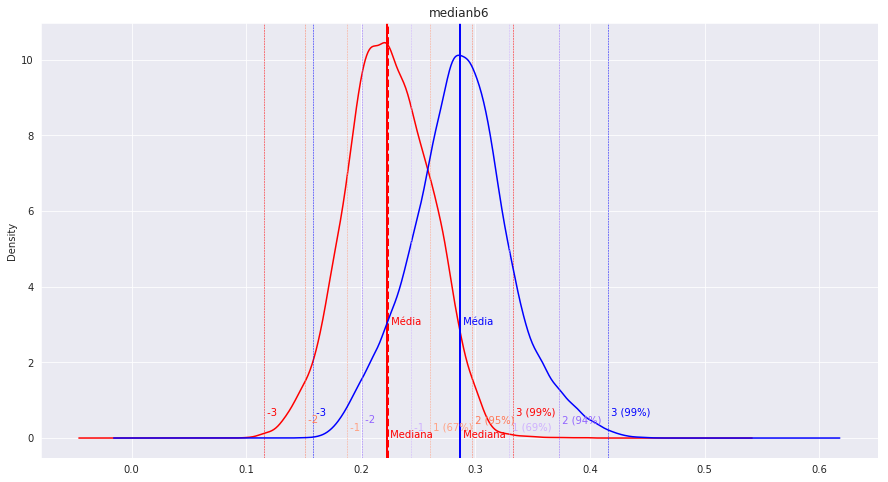

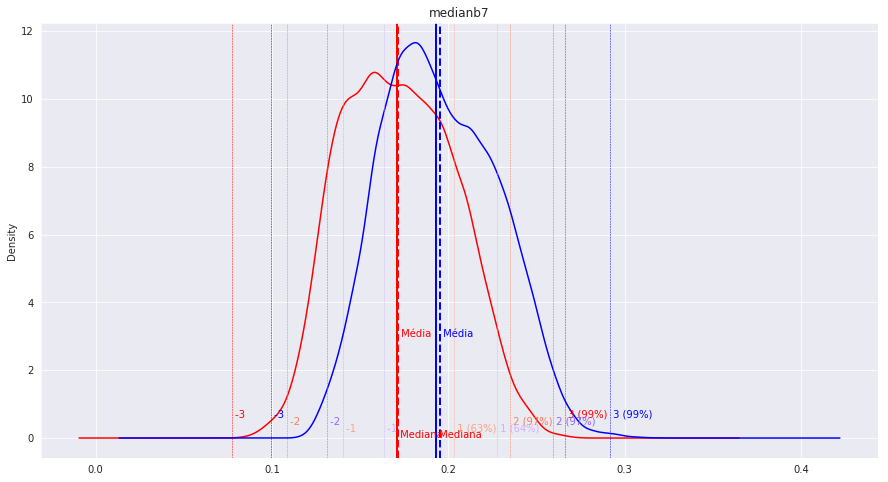

In [183]:
for col in cols:
    densidade(col)

In [174]:
for col in cols:
    mi1 = df1[col].min()
    ma1 = df1[col].max()
    d1 = ((df1[col]-mi1) / (ma1-mi1))
    
    mi3 = df3[col].min()
    ma3 = df3[col].max()
    d3 = ((df3[col]-mi3) / (ma3-mi3))
    
    m1 = np.mean(d1)
    m3 = np.mean(d3)
    print(col, m1, m3, abs(m1-m3))

ndvi 0.4444773614149267 0.5676899995484328 0.12321263813350608
nbrl 0.4766577604699329 0.6296478550557499 0.15299009458581703
dif_ndvi 0.36661278381415047 0.3882398388548357 0.02162705504068524
dif_dnbrl 0.26143519050159775 0.3185672780802696 0.05713208757867183
medianb2 0.2810565360998824 0.3613657873024543 0.08030925120257187
medianb3 0.3731586164925272 0.3702162630678228 0.0029423534247043914
medianb4 0.38619807193692707 0.4679679570408117 0.08176988510388461
medianb5 0.4968061331028511 0.492238796454071 0.004567336648780118
medianb6 0.4198119969347143 0.46938013543197615 0.04956813849726183
medianb7 0.4678935114668466 0.4036774352611818 0.06421607620566477
